In [ ]:
# **Google Earth Engine no Python**

Neste notebook são apresentados tópicos para compreensão e utilização do GEE na API Python por meio do **geemap e eareth-engine api**.

O geemap é um ambiente baseado em Jupyter que estende e aprimora a API Python do Earth Engine usando folium, ipyleaflet e ipywidgets. Ele permite que os usuários analisem e visualizem conjuntos de dados do Earth Engine interativamente em notebooks.

Iremos realizar as seguintes atividades:

* Instalação dos pacotes geemap, earth engine e geopandas
* Autenticação do Usuário ee.
* Definição da área de estudo 
* Conversão de shp to json
* Extrair dados de precipitação
* Gerar um Dataframe 
* Gráfico Série Temporal


Informações sobre os pacotes utilizados podem ser encontradas nas referências abaixo.

* [Geopandas]('https://geopandas.org/en/stable/index.html')
* [Geemap]('https://geemap.org/')
* [Earth Engine]('https://developers.google.com/earth-engine/guides/python_install')




# **Diferenças entre sintaxe Js e Python.**
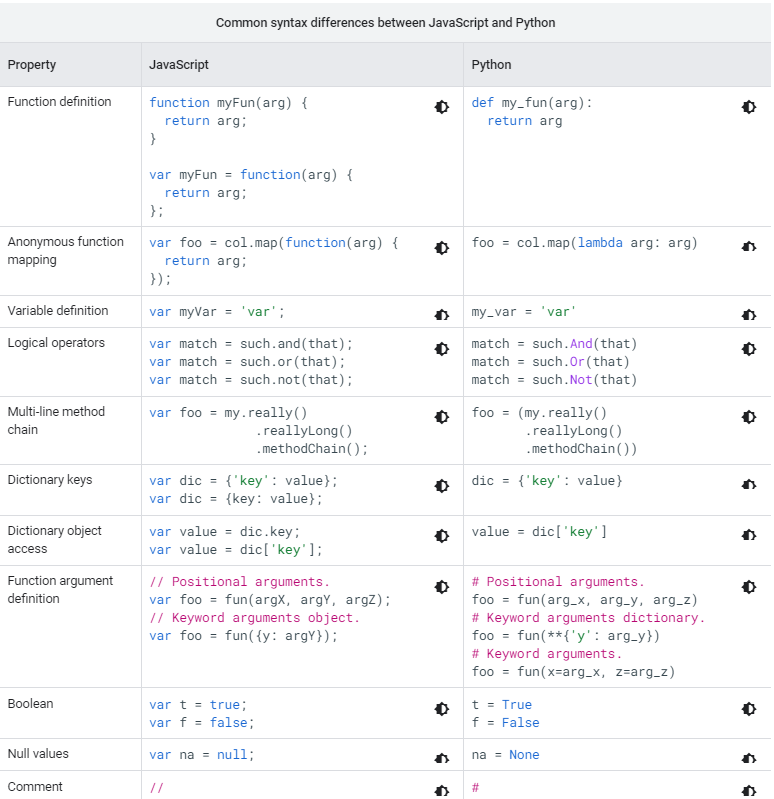

# **Instalação, import e autenticação**

In [ ]:
##Instalação das Bibliotecas/pacotes
!pip install earthengine-api geemap geopandas descartes -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 82.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
##Importar pacotes que iremos utilizar 

##Sensoriamento Remoto e Geoprocessamento
import ee 
import geemap
import geopandas as gpd
import json

##Banco de dados e Gráficos
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [4]:
##Autenticação do EE por meio do token
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AVHEtk6C3_5klHowhBk0WyNZaDoRgmnUULZrdFOB2UTJelfCS9GTvc6nZ48

Successfully saved authorization token.


EEException: Google Earth Engine API has not been used in project 180321722618 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/earthengine.googleapis.com/overview?project=180321722618 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.

# **Definição da área de estudo**

In [5]:
## Vamos abrir um arquivo shp de nossa base 
gdf = gpd.read_file('/content/drive/MyDrive/BASES/BR_UF_2021.shp')
gdf.head()

DriverError: '/content/drive/MyDrive/BASES/BR_UF_2021.shp' does not exist in the file system, and is not recognized as a supported dataset name.

<Axes: >

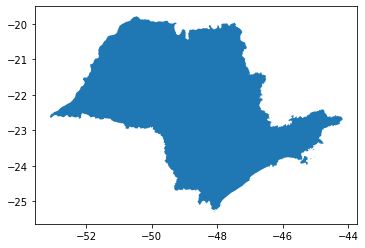

In [ ]:
## Vamos filtrar os dados para nossa região de interesse
gdf_filter = gdf[gdf.SIGLA=='SP']
gdf_filter.plot()

In [ ]:
###Precisamos converter o formato do arquivo shp to json
###o EE trabalha com sua base em json.

##convertendo de shp para to json
shp_to_json = gdf_filter.to_json()

##Após realizar a conversão precisamos carregar esse arquivo json
##Carregando o arquivo json
roi = json.loads(shp_to_json)

##selecionando as features
roi = roi['features']
##Verificando o processo
roi

In [ ]:
###Agora vamos utilizar essa roi como nossa região de interesse
region = ee.FeatureCollection(roi)

# Defina um método para exibir blocos de imagens do Earth Engine em um folium map
Map = geemap.Map()
##Centralizando a imagem
Map = geemap.Map(location=[-23.882358998999962,-46.17963099999997], zoom_start= 10)

##Adicionando a feature  = Converte para Image (desenha o limite)
image = ee.Image().paint(region, 0, 2)
Map.addLayer(image,{'palette':'red'}, 'ROI')

display(Map)

Map(center=[-23.882358998999962, -46.17963099999997], controls=(WidgetControl(options=['position', 'transparen…



```
# Isto está formatado como código
```

# ***Precipitaçaõ: Série Histórica***

In [ ]:
##Defindo o ponto para selecionar a imagen sobre a região
collection = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY')\
                                              .filterDate('2021-01-01','2023-03-01')\
                                              .filterBounds(region)                                     

##Quantas imagens estamos analisando
print(collection.size().getInfo())

761


In [ ]:
# Defina um método para exibir blocos de imagens do Earth Engine em um folium map
Map = geemap.Map()
##Centralizando a imagem
Map = geemap.Map(location=[-23.882358998999962,-46.17963099999997], zoom_start= 10)

##Visualizando a imagem sobre a reigão 
chuva_2020 = collection.filterDate('2021-01-01','2022-01-01').sum().rename('precipitation_2020').clip(region)##acumula os dados anuais de chuva
chuva_2021 = collection.filterDate('2022-01-01','2023-01-01').sum().rename('precipitation_2021').clip(region)##acumula os dados anuais de chuva

##Adicionando o Layer 
Map.add_ee_layer(chuva_2020, {'palette':['violet','cyan','blue','darkblue'],'min': 623,'max': 2300}, '2020')
Map.addLayer(chuva_2021, {'palette':['violet','cyan','blue','darkblue'],'min': 623,'max': 2300}, '2021')

##Finalizando a tarefa
display(Map)

Map(center=[-23.882358998999962, -46.17963099999997], controls=(WidgetControl(options=['position', 'transparen…

# **Análises estatísticas**

In [ ]:
##Qual é a precipitação mínima, média e máxima da nossa região de estudo
reducers = ee.Reducer.min().combine(**{
  'reducer2': ee.Reducer.mean(),
  'sharedInputs': True
}).combine(**{
  'reducer2': ee.Reducer.max(),
  'sharedInputs': True
});

In [1]:
###Agora vamos aplicar os redutores estatísticos em nossa imagem

##imagem
precipitation = chuva_2020.addBands(chuva_2021)

##Estatística 
stats = precipitation.reduceRegion(**{
  'geometry':region,
  'reducer': reducers,
  'bestEffort': True,
  'scale':5566,
  'crs':'EPSG:4674',
  'maxPixels': 1e13
});

print(stats.getInfo());

NameError: name 'chuva_2020' is not defined

In [ ]:
##Vamos organizar um dataframe desta informações
##Convertendo dados para uma lista
lista = ee.List(stats).getInfo()
print(lista)

{'precipitation_2020_max': 2501.725229740143, 'precipitation_2020_mean': 1055.2229889849673, 'precipitation_2020_min': 616.6737548112869, 'precipitation_2021_max': 2835.4150786776963, 'precipitation_2021_mean': 1201.860030055934, 'precipitation_2021_min': 750.7693090736866}


In [ ]:
##Criando dataframe da importância das variáveis
precipita_df = pd.DataFrame(lista.items(), columns=['Precipitation','value'])
precipita_df = precipita_df.round(2)
precipita_df['legenda'] = ['2021','2021','2021','2022','2022','2022']
precipita_df['stats'] = ['Precipitação Máxima','Precipitação Média','Precipitaçaõ Mínima','Precipitação Máxima','Precipitação Média','Precipitaçaõ Mínima']
precipita_df

,Precipitation,value,legenda,stats
0,precipitation_2020_max,2501.73,2021,Precipitação Máxima
1,precipitation_2020_mean,1055.22,2021,Precipitação Média
2,precipitation_2020_min,616.67,2021,Precipitaçaõ Mínima
3,precipitation_2021_max,2835.42,2022,Precipitação Máxima
4,precipitation_2021_mean,1201.86,2022,Precipitação Média
5,precipitation_2021_min,750.77,2022,Precipitaçaõ Mínima


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

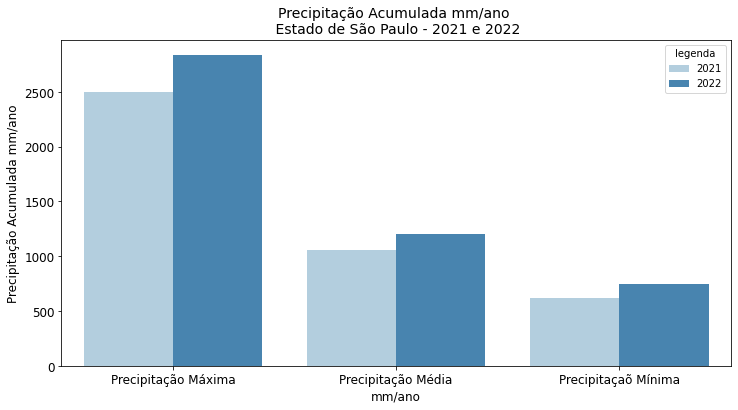

In [ ]:
##Gerar um gráfico 

##Definindo o tamanho da figura
plt.figure(figsize=(12,6))

g = sns.barplot(data=precipita_df, x="stats", y="value", hue="legenda", palette='Blues')
#Título
plt.title('Precipitação Acumulada mm/ano \n Estado de São Paulo - 2021 e 2022', fontsize =14)

##eixo x
plt.xlabel('mm/ano',fontsize=12)
plt.xticks(fontsize=12)
##eixo y
plt.ylabel('Precipitação Acumulada mm/ano',fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
##Vamos Obter os valores de Precipitação médio, mínimo e máximo para a região
##Iremos utlizar o reduce regions
##Função para converter informações da imagem em tabela
def reduce (image):
    serie_reduce = image.clip(region).reduceRegions(**{
                        'collection':region,
                        'reducer': ee.Reducer.mean().combine(**{
                        'reducer2': ee.Reducer.min(), 
                                    'sharedInputs': True}).combine(**{
                        'reducer2': ee.Reducer.max(),
                                    'sharedInputs': True}), 
                        'scale': 5566
                        })
     
    serie_reduce = serie_reduce.map(lambda f: f.set({'data': image.date().format('YYYY-MM-dd')}))         

    return serie_reduce.copyProperties(image, ["system:time_start"])

##Aplicando a função de redução na Coleção 
data_reduce = collection.map(reduce)\
                        .flatten()\
                        .sort('data',True)\
                        .select(['SIGLA','data','min','mean','max'])

##Verificando os dados e as propriedades
# print(data_reduce.size().getInfo())
# print(data_reduce.first().propertyNames().getInfo())

In [ ]:
##Criando nosso dataframe a partir dos dados reduzidos 
##Estabelecendo a lista dos dados
stats_list = data_reduce.reduceColumns(ee.Reducer.toList(5), ['SIGLA','data','min','mean','max']).values().get(0)

# não se esqueça que precisamos chamar o método de retorno de chamada "getInfo" para recuperar os dados
df = pd.DataFrame(stats_list.getInfo(), columns=['SIGLA','data','p_min','p_mean','p_max'])
df.head()

,SIGLA,data,p_min,p_mean,p_max
0,SP,2021-01-01,0,2.444012,36.671513
1,SP,2021-01-02,0,3.197520,53.156788
2,SP,2021-01-03,0,1.391716,30.097792
3,SP,2021-01-04,0,1.940916,24.196306
4,SP,2021-01-05,0,3.537415,48.257507


In [ ]:
###Agrupamento dos dados por mês
df['mes'] = pd.to_datetime (df['data']).dt.month
df['n_mes'] = pd.to_datetime (df['data']).dt.month_name()
df['ano'] = pd.to_datetime (df['data']).dt.year
df.head()

,SIGLA,data,p_min,p_mean,p_max,mes,n_mes,ano
0,SP,2021-01-01,0,2.444012,36.671513,1,January,2021
1,SP,2021-01-02,0,3.197520,53.156788,1,January,2021
2,SP,2021-01-03,0,1.391716,30.097792,1,January,2021
3,SP,2021-01-04,0,1.940916,24.196306,1,January,2021
4,SP,2021-01-05,0,3.537415,48.257507,1,January,2021


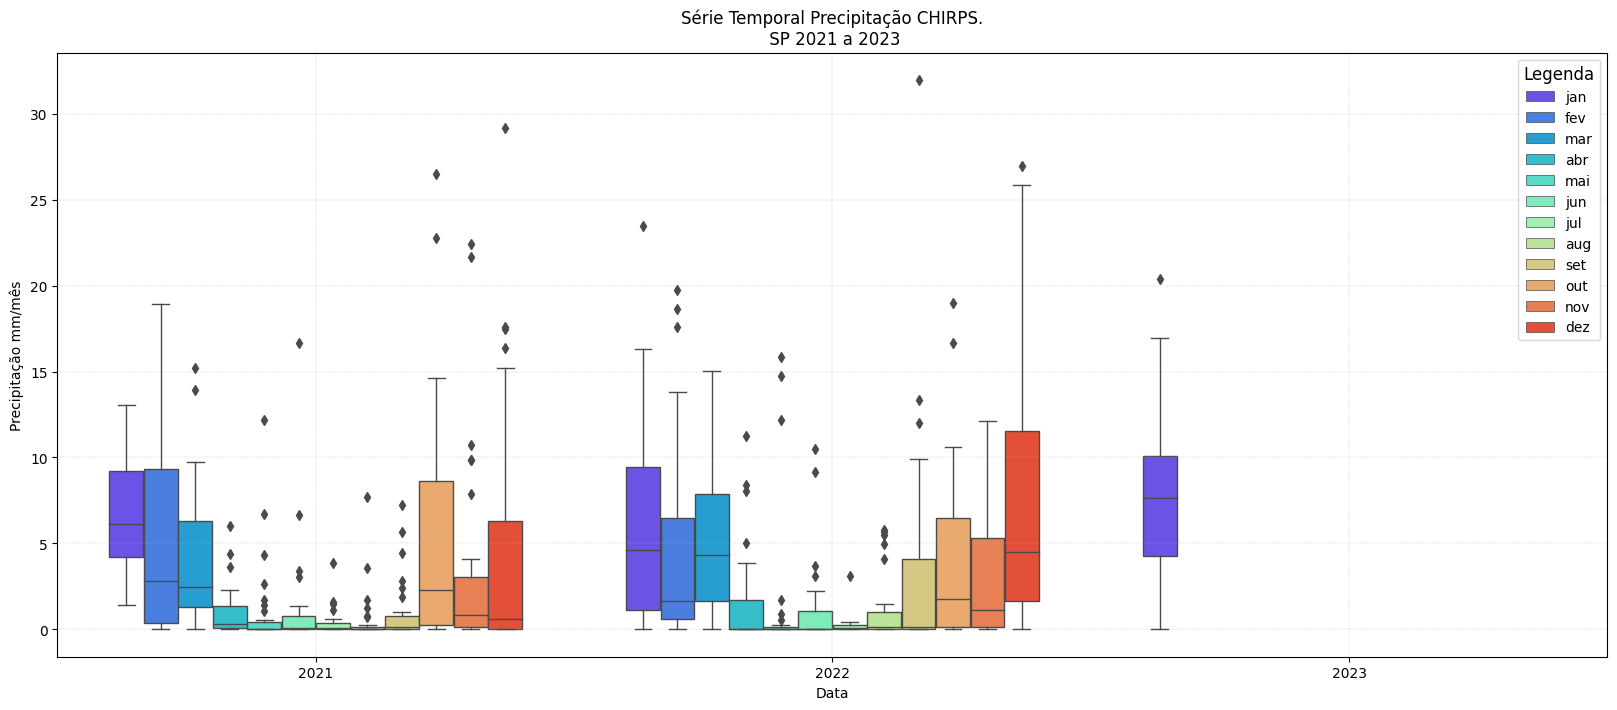

In [ ]:
##Gráfico contendo as informações 
nome=str(df.SIGLA[0])
data_fim =str(df.ano.max())[:4]
data_inicial = str(df.ano.min())[:4]
##Análise Gráfica 
fig, ax = plt.subplots(1,1,figsize=(20, 8), dpi= 100) 
#Título
plt.title('Série Temporal Precipitação CHIRPS.\n {} {} a {}'.format(nome, data_inicial, data_fim))

##Extrair dados
g= sns.boxplot(x='ano', y='p_mean', hue='n_mes', ax=ax, data=df, palette="rainbow", linewidth=1)

##Personalizando o gráfico
plt.grid(linestyle='--', linewidth=0.2, which='both')
handles, _ = ax.get_legend_handles_labels()  
ax.legend(handles, ['jan','fev','mar','abr','mai','jun','jul','aug','set','out','nov','dez'],
          loc="best",title = "Legenda", title_fontsize = "12")

##Eixo X
plt.xlabel('Data')
plt.xticks(rotation=0)
##Eixo Y
plt.ylabel('Precipitação mm/mês')
plt.show()

In [ ]:
###Média mensal
df_month = df.groupby(['ano','mes'])[['p_mean']].sum().reset_index() 
df_month

,ano,mes,p_mean
0,2021,1,205.354757
1,2021,2,147.348986
2,2021,3,127.232846
3,2021,4,27.988412
4,2021,5,31.634255
5,2021,6,36.274186
6,2021,7,11.541759
7,2021,8,16.715604
8,2021,9,28.885511
9,2021,10,168.788283


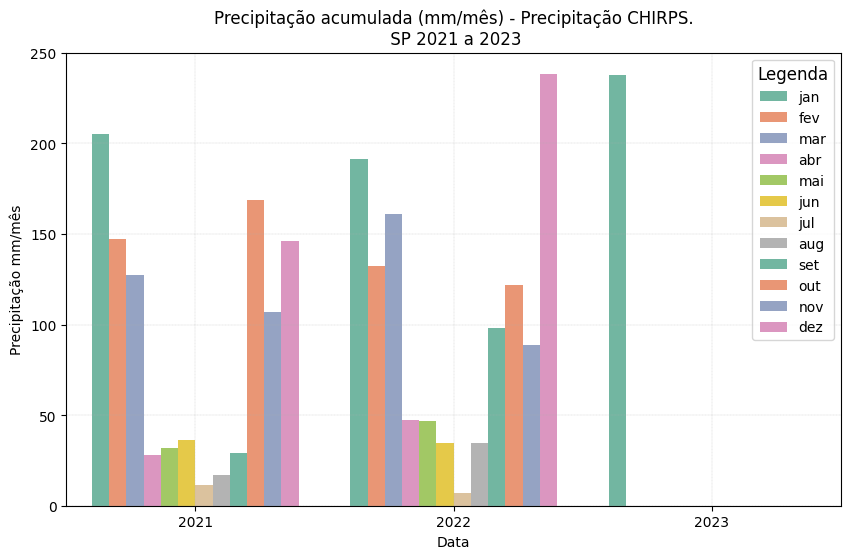

In [ ]:
##Gráfico de barras
fig, ax = plt.subplots(1,1,figsize=(10, 6), dpi= 100) 

##Tipo de gráficos
sns.barplot(x="ano", y='p_mean', hue='mes', data=df_month, palette="Set2")

#Título
plt.title('Precipitação acumulada (mm/mês) - Precipitação CHIRPS.\n {} {} a {}'.format(nome, data_inicial, data_fim))

##Personalizando o gráfico
plt.grid(linestyle='--', linewidth=0.2, which='both')
handles, _ = ax.get_legend_handles_labels()  
ax.legend(handles, ['jan','fev','mar','abr','mai','jun','jul','aug','set','out','nov','dez'],
          loc="upper right",title = "Legenda", title_fontsize = "12")

##Eixo X
plt.xlabel('Data')
plt.xticks(rotation=0)
##Eixo Y
plt.ylabel('Precipitação mm/mês')
plt.show() 